In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import folium
import re

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

##### 폰트를 NanumBarunpenB로 설정해주자

In [3]:
font_path = 'C:/windows/fonts/NanumBarunpenB.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [4]:
# 글자 선명
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

C:\Users\admin\AppData\Local\Temp\ipykernel_6636\141453295.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


#### 주유소 위경도 csv 파일 불러오기

In [5]:
df = pd.read_csv('./data/주유소 위경도.csv', encoding='utf-8')
df.head()

,상호,주소,Unnamed: 2
0,(주)개금태화주유소,부산 부산진구 가야대로 402,"X :129.016910, Y :35.1514817"
1,(주)경인석유,부산 남구 신선로 448 (용당동),"X :129.100468, Y :35.1248122"
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),"X :128.897647, Y :35.1248039"
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,"X :129.289381, Y :35.3315196"
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),"X :129.047706, Y :35.0948319"


#### 컬럼 값이 없는 것을 위경도로 설정해준다, 값이 없는 392,393 행 제거 

In [6]:
df.rename(columns={'Unnamed: 2' : '위경도'}, inplace=True)
df = df.drop(index=392, axis=0)
df = df.drop(index=393, axis=0)
df

,상호,주소,위경도
0,(주)개금태화주유소,부산 부산진구 가야대로 402,"X :129.016910, Y :35.1514817"
1,(주)경인석유,부산 남구 신선로 448 (용당동),"X :129.100468, Y :35.1248122"
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),"X :128.897647, Y :35.1248039"
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,"X :129.289381, Y :35.3315196"
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),"X :129.047706, Y :35.0948319"
...,...,...,...
387,SK에너지(주)신광셀프주유소,부산 북구 덕천로 275 (만덕동),"X :129.034087, Y :35.2098781"
388,SK에너지(주)신도시주유소,부산 해운대구 대천로 82 (좌동),"X :129.171720, Y :35.1735968"
389,SK에너지(주)직영 태종로주유소,부산 영도구 태종로 290 (청학동),"X :129.057642, Y :35.0979530"
390,SK에너지(주)직영 해운대센텀주유소,부산 해운대구 수영강변대로 276,"X :129.119134, Y :35.1835484"


##### 위경도 컬럼에서의 값들을 ,로 둘로 나누고 i번째의 경도 컬럼에 넣어준다

#### 경도 컬럼에 위경도의 값들을 ,로 둘로 나누고 i번째의 0번째의 값을 가져온다

In [7]:
df['경도'] = 0

for i in df.index:
    df['경도'][i] = df['위경도'].str.split(',')[i][0]

df

C:\Users\admin\AppData\Local\Temp\ipykernel_6636\2673356394.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['경도'][i] = df['위경도'].str.split(',')[i][0]


,상호,주소,위경도,경도
0,(주)개금태화주유소,부산 부산진구 가야대로 402,"X :129.016910, Y :35.1514817",X :129.016910
1,(주)경인석유,부산 남구 신선로 448 (용당동),"X :129.100468, Y :35.1248122",X :129.100468
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),"X :128.897647, Y :35.1248039",X :128.897647
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,"X :129.289381, Y :35.3315196",X :129.289381
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),"X :129.047706, Y :35.0948319",X :129.047706
...,...,...,...,...
387,SK에너지(주)신광셀프주유소,부산 북구 덕천로 275 (만덕동),"X :129.034087, Y :35.2098781",X :129.034087
388,SK에너지(주)신도시주유소,부산 해운대구 대천로 82 (좌동),"X :129.171720, Y :35.1735968",X :129.171720
389,SK에너지(주)직영 태종로주유소,부산 영도구 태종로 290 (청학동),"X :129.057642, Y :35.0979530",X :129.057642
390,SK에너지(주)직영 해운대센텀주유소,부산 해운대구 수영강변대로 276,"X :129.119134, Y :35.1835484",X :129.119134


##### 위도 컬럼에 위경도의 값들을 ,로 둘로 나누고 i번째의 0번째의 값을 가져온다

In [8]:
df['위도'] = 0

for i in df.index:
    df['위도'][i] = (df['위경도'].str.split(',')[i][1])
df

C:\Users\admin\AppData\Local\Temp\ipykernel_6636\3340694080.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['위도'][i] = (df['위경도'].str.split(',')[i][1])


,상호,주소,위경도,경도,위도
0,(주)개금태화주유소,부산 부산진구 가야대로 402,"X :129.016910, Y :35.1514817",X :129.016910,Y :35.1514817
1,(주)경인석유,부산 남구 신선로 448 (용당동),"X :129.100468, Y :35.1248122",X :129.100468,Y :35.1248122
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),"X :128.897647, Y :35.1248039",X :128.897647,Y :35.1248039
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,"X :129.289381, Y :35.3315196",X :129.289381,Y :35.3315196
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),"X :129.047706, Y :35.0948319",X :129.047706,Y :35.0948319
...,...,...,...,...,...
387,SK에너지(주)신광셀프주유소,부산 북구 덕천로 275 (만덕동),"X :129.034087, Y :35.2098781",X :129.034087,Y :35.2098781
388,SK에너지(주)신도시주유소,부산 해운대구 대천로 82 (좌동),"X :129.171720, Y :35.1735968",X :129.171720,Y :35.1735968
389,SK에너지(주)직영 태종로주유소,부산 영도구 태종로 290 (청학동),"X :129.057642, Y :35.0979530",X :129.057642,Y :35.0979530
390,SK에너지(주)직영 해운대센텀주유소,부산 해운대구 수영강변대로 276,"X :129.119134, Y :35.1835484",X :129.119134,Y :35.1835484


##### 경도, 위도 컬럼 값들중 필요없는 (X :, Y :)을 공백으로 변환

In [9]:
df['경도'] = df['경도'].str.replace('X :', '')
df['위도'] = df['위도'].str.replace('Y :', '')
df.head()

,상호,주소,위경도,경도,위도
0,(주)개금태화주유소,부산 부산진구 가야대로 402,"X :129.016910, Y :35.1514817",129.016910,35.1514817
1,(주)경인석유,부산 남구 신선로 448 (용당동),"X :129.100468, Y :35.1248122",129.100468,35.1248122
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),"X :128.897647, Y :35.1248039",128.897647,35.1248039
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,"X :129.289381, Y :35.3315196",129.289381,35.3315196
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),"X :129.047706, Y :35.0948319",129.047706,35.0948319


##### 위경도 컬럼 제거

In [10]:
df = df.drop(columns='위경도')
df.head()

,상호,주소,경도,위도
0,(주)개금태화주유소,부산 부산진구 가야대로 402,129.016910,35.1514817
1,(주)경인석유,부산 남구 신선로 448 (용당동),129.100468,35.1248122
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),128.897647,35.1248039
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,129.289381,35.3315196
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),129.047706,35.0948319


##### 주유소_유가_데이터_NaN제외 csv파일 가져오기

In [11]:
data = pd.read_csv('./data/주유소_유가_데이터_NaN제외.csv', encoding='utf-8')
data.head()

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유
0,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220209,S-OIL,셀프,1638,1498
1,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220210,S-OIL,셀프,1638,1498
2,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220211,S-OIL,셀프,1638,1498
3,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220212,S-OIL,셀프,1638,1498
4,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220213,S-OIL,셀프,1638,1498


##### 필요한 컬럼값들로 구성된 데이터를 만들어서 중복되는 값을 제거

In [12]:
columns = ['상호', '셀프여부', '상표']
data_get = data[columns].copy()
data_get = data_get.drop_duplicates(subset=None, keep='first', ignore_index=False)
data_get

,상호,셀프여부,상표
0,(주)DJS신항만물류단지주유소,셀프,S-OIL
182,(주)경인에너지,일반,S-OIL
364,(주)만은에너지 대사리주유소,셀프,GS칼텍스
546,(주)범방주유소,일반,SK에너지
728,(주)비에스이강동주유소,셀프,현대오일뱅크
...,...,...,...
68615,해변주유소,셀프,SK에너지
68797,해운대주유소,셀프,S-OIL
68979,현대오일뱅크(주)직영 장산IC주유소,일반,GS칼텍스
69088,현대오일뱅크(주)직영 장산IC주유소,일반,현대오일뱅크


##### df, data_get 데이터를 merge로 합친다

In [13]:
all_data = pd.merge(df, data_get, how='inner')
all_data

,상호,주소,경도,위도,셀프여부,상표
0,(주)개금태화주유소,부산 부산진구 가야대로 402,129.016910,35.1514817,셀프,SK에너지
1,(주)경인석유,부산 남구 신선로 448 (용당동),129.100468,35.1248122,셀프,SK에너지
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),128.897647,35.1248039,일반,S-OIL
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,129.289381,35.3315196,일반,S-OIL
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),129.047706,35.0948319,일반,SK에너지
...,...,...,...,...,...,...
393,SK에너지(주)신광셀프주유소,부산 북구 덕천로 275 (만덕동),129.034087,35.2098781,셀프,SK에너지
394,SK에너지(주)신도시주유소,부산 해운대구 대천로 82 (좌동),129.171720,35.1735968,셀프,SK에너지
395,SK에너지(주)직영 태종로주유소,부산 영도구 태종로 290 (청학동),129.057642,35.0979530,셀프,SK에너지
396,SK에너지(주)직영 해운대센텀주유소,부산 해운대구 수영강변대로 276,129.119134,35.1835484,셀프,SK에너지


In [14]:
data_get.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 69149
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      397 non-null    object
 1   셀프여부    397 non-null    object
 2   상표      397 non-null    object
dtypes: object(3)
memory usage: 12.4+ KB


#### 부산 주유소 위치 시각화

In [15]:
map = folium.Map(location=[35.160389, 129.043961], zoom_start=10)

for i in all_data.index:
    sub_lat = all_data.loc[i, '위도']
    sub_long = all_data.loc[i, '경도']
    
    title = f"{all_data.loc[i, '상호']} - {all_data.loc[i, '주소']}"
    
    folium.CircleMarker(location=[sub_lat, sub_long],
                        radius=3,
                        tooltip=title).add_to(map)
map

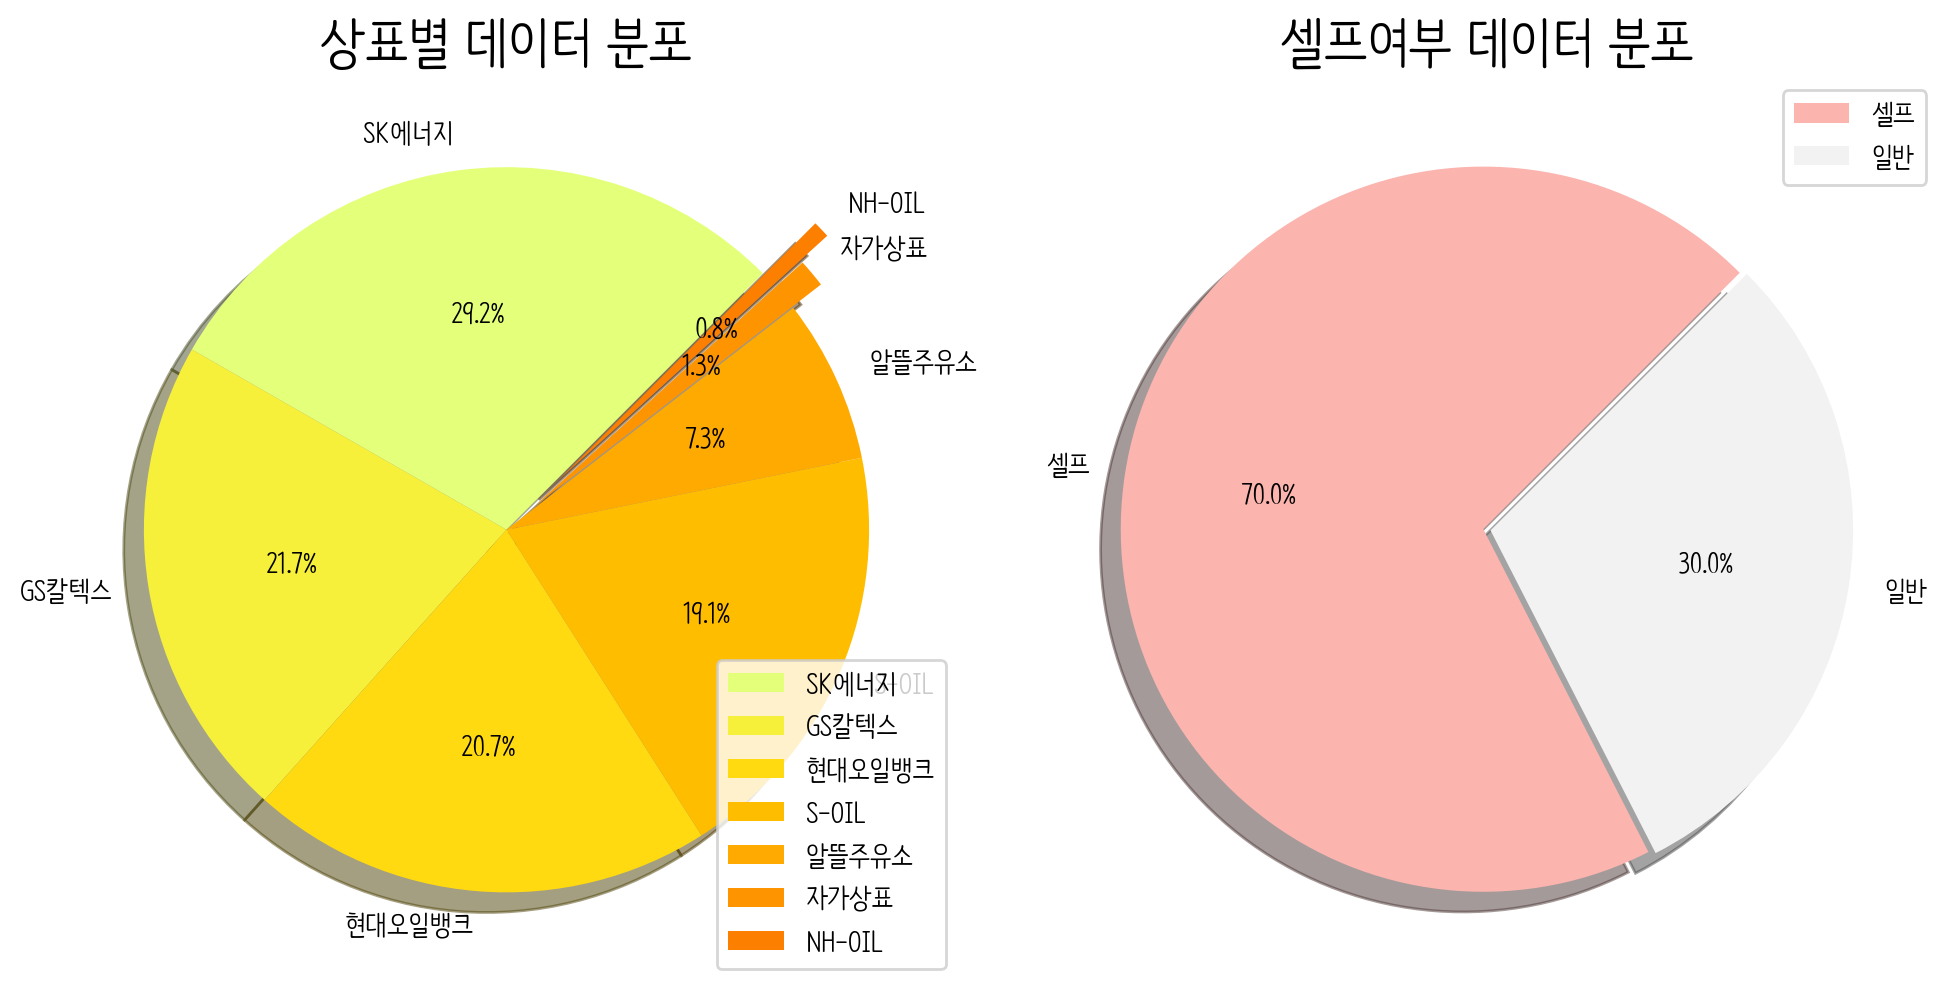

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=100, facecolor='white')

count_df = data_get[['상호','상표','셀프여부']].drop_duplicates()

size = count_df['상표'].value_counts()
labels = count_df['상표'].value_counts().index
colors=plt.cm.Wistia(np.linspace(0,1,count_df['상표'].value_counts().shape[0]))
explode = [0,0,0,0,0,0.1,0.2]

ax[0].pie(size, labels=labels, colors=colors, shadow=True, startangle=45, explode=explode,autopct='%.1f%%')
ax[0].set_title('상표별 데이터 분포',fontsize=20)
ax[0].legend()


size = count_df['셀프여부'].value_counts()
labels = count_df['셀프여부'].value_counts().index
colors = plt.cm.Pastel1(np.linspace(0, 1, 2))
explode = [0.01, 0.01]

ax[1].pie(size, labels=labels, colors=colors, shadow=True, startangle=45, explode=explode,autopct='%.1f%%')
ax[1].set_title('셀프여부 데이터 분포',fontsize=20)
ax[1].legend()

plt.tight_layout()
plt.show()

#### 상표별

In [49]:
map = folium.Map(location=[35.160389, 129.043961], zoom_start=10)

for i in all_data.index:
    sub_lat = all_data.loc[i, '위도']
    sub_long = all_data.loc[i, '경도']
    
    # popup = f"{all_data['상호'].iloc[i]} - {all_data['상표'].iloc[i]}"
    iframe = folium.IFrame(f"{all_data['상호'].iloc[i]} <br> {all_data['상표'].iloc[i]}")
    popup = folium.Popup(iframe, min_width=200, max_width=100)
    
    color = 'purple'
    if all_data.loc[i, '상표'] == 'SK에너지':
        color = 'red'
    if all_data.loc[i, '상표'] == 'GS칼텍스':
        color = 'green'
    if all_data.loc[i, '상표'] == '현대오일뱅크':
        color = 'blue'
    if all_data.loc[i, '상표'] == 'S-OIL':
        color = 'yellow'
    if all_data.loc[i, '상표'] == '알뜰주유소':
        color = 'orange'
    if all_data.loc[i, '상표'] == '자가상표':
        color = 'black'
    
    folium.Marker(location=[sub_lat, sub_long],
                        icon=folium.Icon(color=color,icon='tint'), popup=popup).add_to(map)
map

C:\Users\admin\AppData\Local\Temp\ipykernel_6636\2423451638.py:26: UserWarning: color argument of Icon should be one of: {'orange', 'darkgreen', 'cadetblue', 'purple', 'darkblue', 'blue', 'black', 'darkpurple', 'beige', 'pink', 'lightred', 'lightblue', 'lightgreen', 'gray', 'lightgray', 'red', 'white', 'green', 'darkred'}.
  icon=folium.Icon(color=color,icon='tint'), popup=popup).add_to(map)


#### 셀프여부

In [18]:
all_data['셀프여부'].value_counts()

셀프    279
일반    119
Name: 셀프여부, dtype: int64

<AxesSubplot:xlabel='셀프여부', ylabel='count'>

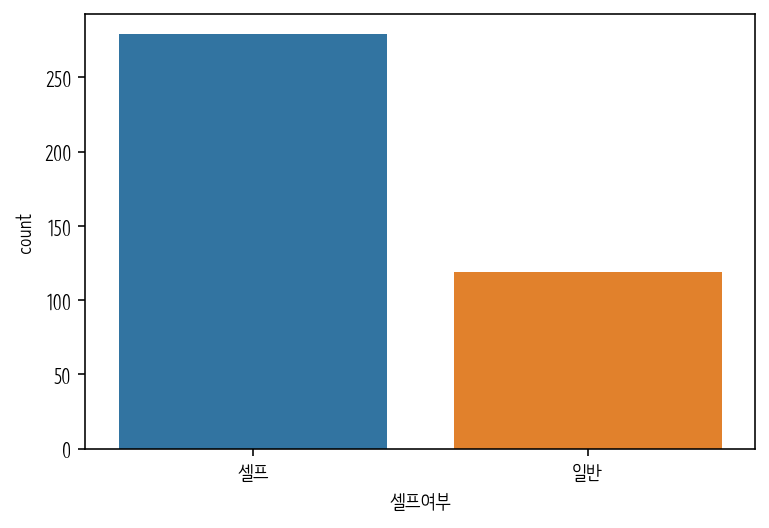

In [19]:
sns.countplot(data=all_data, x='셀프여부')

In [20]:
map = folium.Map(location=[35.160389, 129.043961], zoom_start=10)

for i in all_data.index:
    sub_lat = all_data.loc[i, '위도']
    sub_long = all_data.loc[i, '경도']
    
    title = f"{all_data.loc[i, '상호']} - {all_data.loc[i, '셀프여부']}"
    
    color = 'blue'
    if all_data.loc[i, '셀프여부'] == '일반':
        color = 'orange'

    
    folium.CircleMarker(location=[sub_lat, sub_long],
                        radius=2,
                        color=color,
                        tooltip=title).add_to(map)
map









#### 월간 네이버 검색량 csv불러오기

In [21]:
data_N = pd.read_csv('./data/네이버검색량.csv',encoding='utf-8')
data_N

,키워드,월간 검색량 (Total)
0,주유소 가격비교,318900
1,휘발유,78600
2,기름값 계산기,25450
3,기름값 인하,20040
4,기름값 싼곳,13030
5,유류비,12060
6,주유소 기름값,11330
7,주유,8530
8,주유비계산,8420
9,유가정보,6530


#### 월간 구글 검색량 csv 불러오기

In [22]:
data_G = pd.read_csv('./data/구글검색량.csv',encoding='utf-8')
data_G

,키워드,월 검색량
0,기름값 오르는 이유,1900
1,미국 기름값,1600
2,기름값 전망,1300
3,기름값 계산,880
4,기름값 인하,880
5,기름값 계산기,480
6,서울 기름값,480
7,기름값 추이,390
8,기름값 시세,260
9,기름값 상승,210


#### 구글 월 검색량 값이 0인 index 제거

In [23]:
data_G = data_G.drop(index=data_G[data_G['월 검색량'] == 0].index)
data_G

,키워드,월 검색량
0,기름값 오르는 이유,1900
1,미국 기름값,1600
2,기름값 전망,1300
3,기름값 계산,880
4,기름값 인하,880
5,기름값 계산기,480
6,서울 기름값,480
7,기름값 추이,390
8,기름값 시세,260
9,기름값 상승,210


#### concat하기전 컬럼명 맞추기

In [24]:
data_N.rename(columns={'월간 검색량 (Total)' : '월간검색량'}, inplace=True)
data_G.rename(columns={'월 검색량' : '월간검색량'}, inplace=True)

In [25]:
data_N.head()

,키워드,월간검색량
0,주유소 가격비교,318900
1,휘발유,78600
2,기름값 계산기,25450
3,기름값 인하,20040
4,기름값 싼곳,13030


In [26]:
data_G.head()

,키워드,월간검색량
0,기름값 오르는 이유,1900
1,미국 기름값,1600
2,기름값 전망,1300
3,기름값 계산,880
4,기름값 인하,880


#### 네이버 월간 검색량/ 구글 월간 검색량 csv파일 합치기

In [27]:
data = pd.concat([data_N, data_G], ignore_index=True)
data

,키워드,월간검색량
0,주유소 가격비교,318900
1,휘발유,78600
2,기름값 계산기,25450
3,기름값 인하,20040
4,기름값 싼곳,13030
5,유류비,12060
6,주유소 기름값,11330
7,주유,8530
8,주유비계산,8420
9,유가정보,6530


#### DataFrame -> dic으로 변환

In [28]:
data = data.set_index('키워드').to_dict()['월간검색량']
data

{'주유소 가격비교': 318900,
 '휘발유': 78600,
 '기름값 계산기': 480,
 '기름값 인하': 880,
 '기름값 싼곳': 90,
 '유류비': 12060,
 '주유소 기름값': 11330,
 '주유': 8530,
 '주유비계산': 8420,
 '유가정보': 6530,
 '주유비': 6330,
 '대구 기름값': 50,
 '기름값계산기 네이버': 4300,
 '기름값 전망': 1300,
 '기름값 계산': 880,
 '부산 기름값': 70,
 '국내 유가': 3660,
 '미국 기름값': 1600,
 '제주도 기름값': 2690,
 '100km 기름값': 170,
 '기름값 오르는 이유': 1900,
 '서울 기름값': 480,
 '기름값 추이': 390,
 '기름값 시세': 260,
 '기름값 상승': 210,
 '기름값 그래프': 170,
 '기름값 비교': 140,
 '기름값 언제 내리나': 140,
 '기름값 검색': 40,
 '기름값 가격': 20,
 '기름값 뉴스': 10}

#### 검색량 bar차트로 나타내기

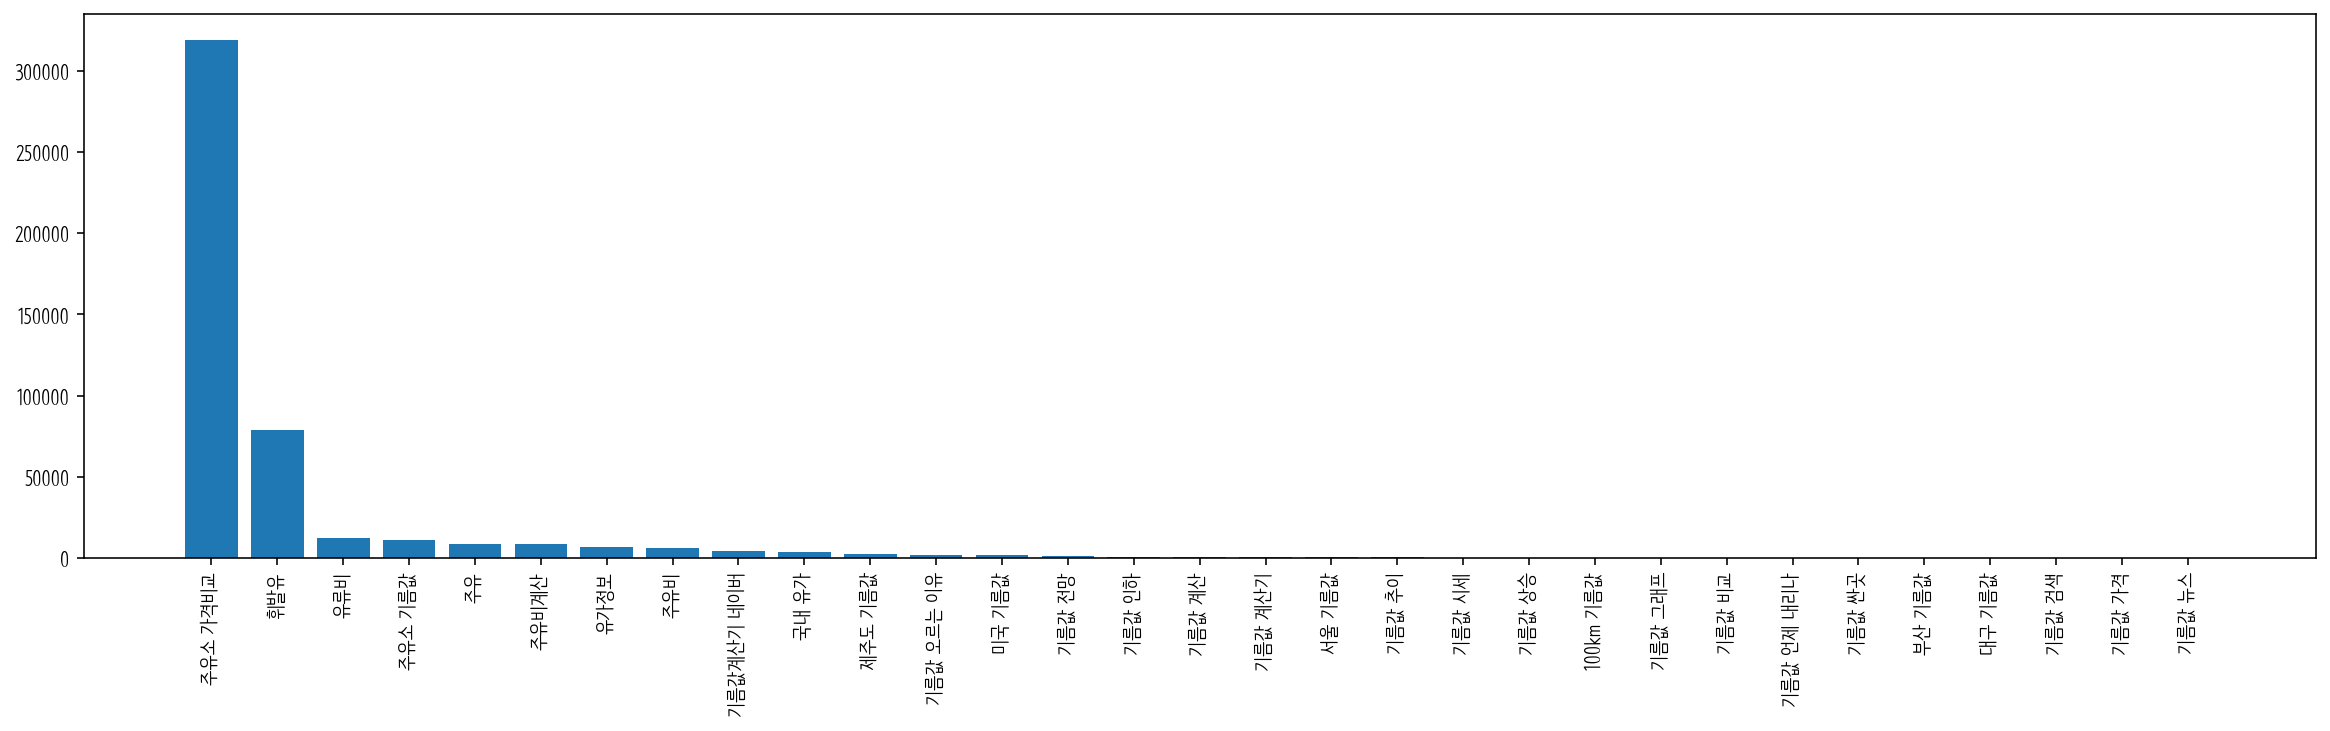

In [29]:
# 단어개수 차트
sorted_keys = sorted(data, key=data.get, reverse=True)
sorted_values = sorted(data.values(), reverse=True)

plt.figure(figsize=(20,5))
plt.bar(range(len(data)), sorted_values, align='center')
plt.xticks(range(len(data)), list(sorted_keys), rotation=90)
plt.show()

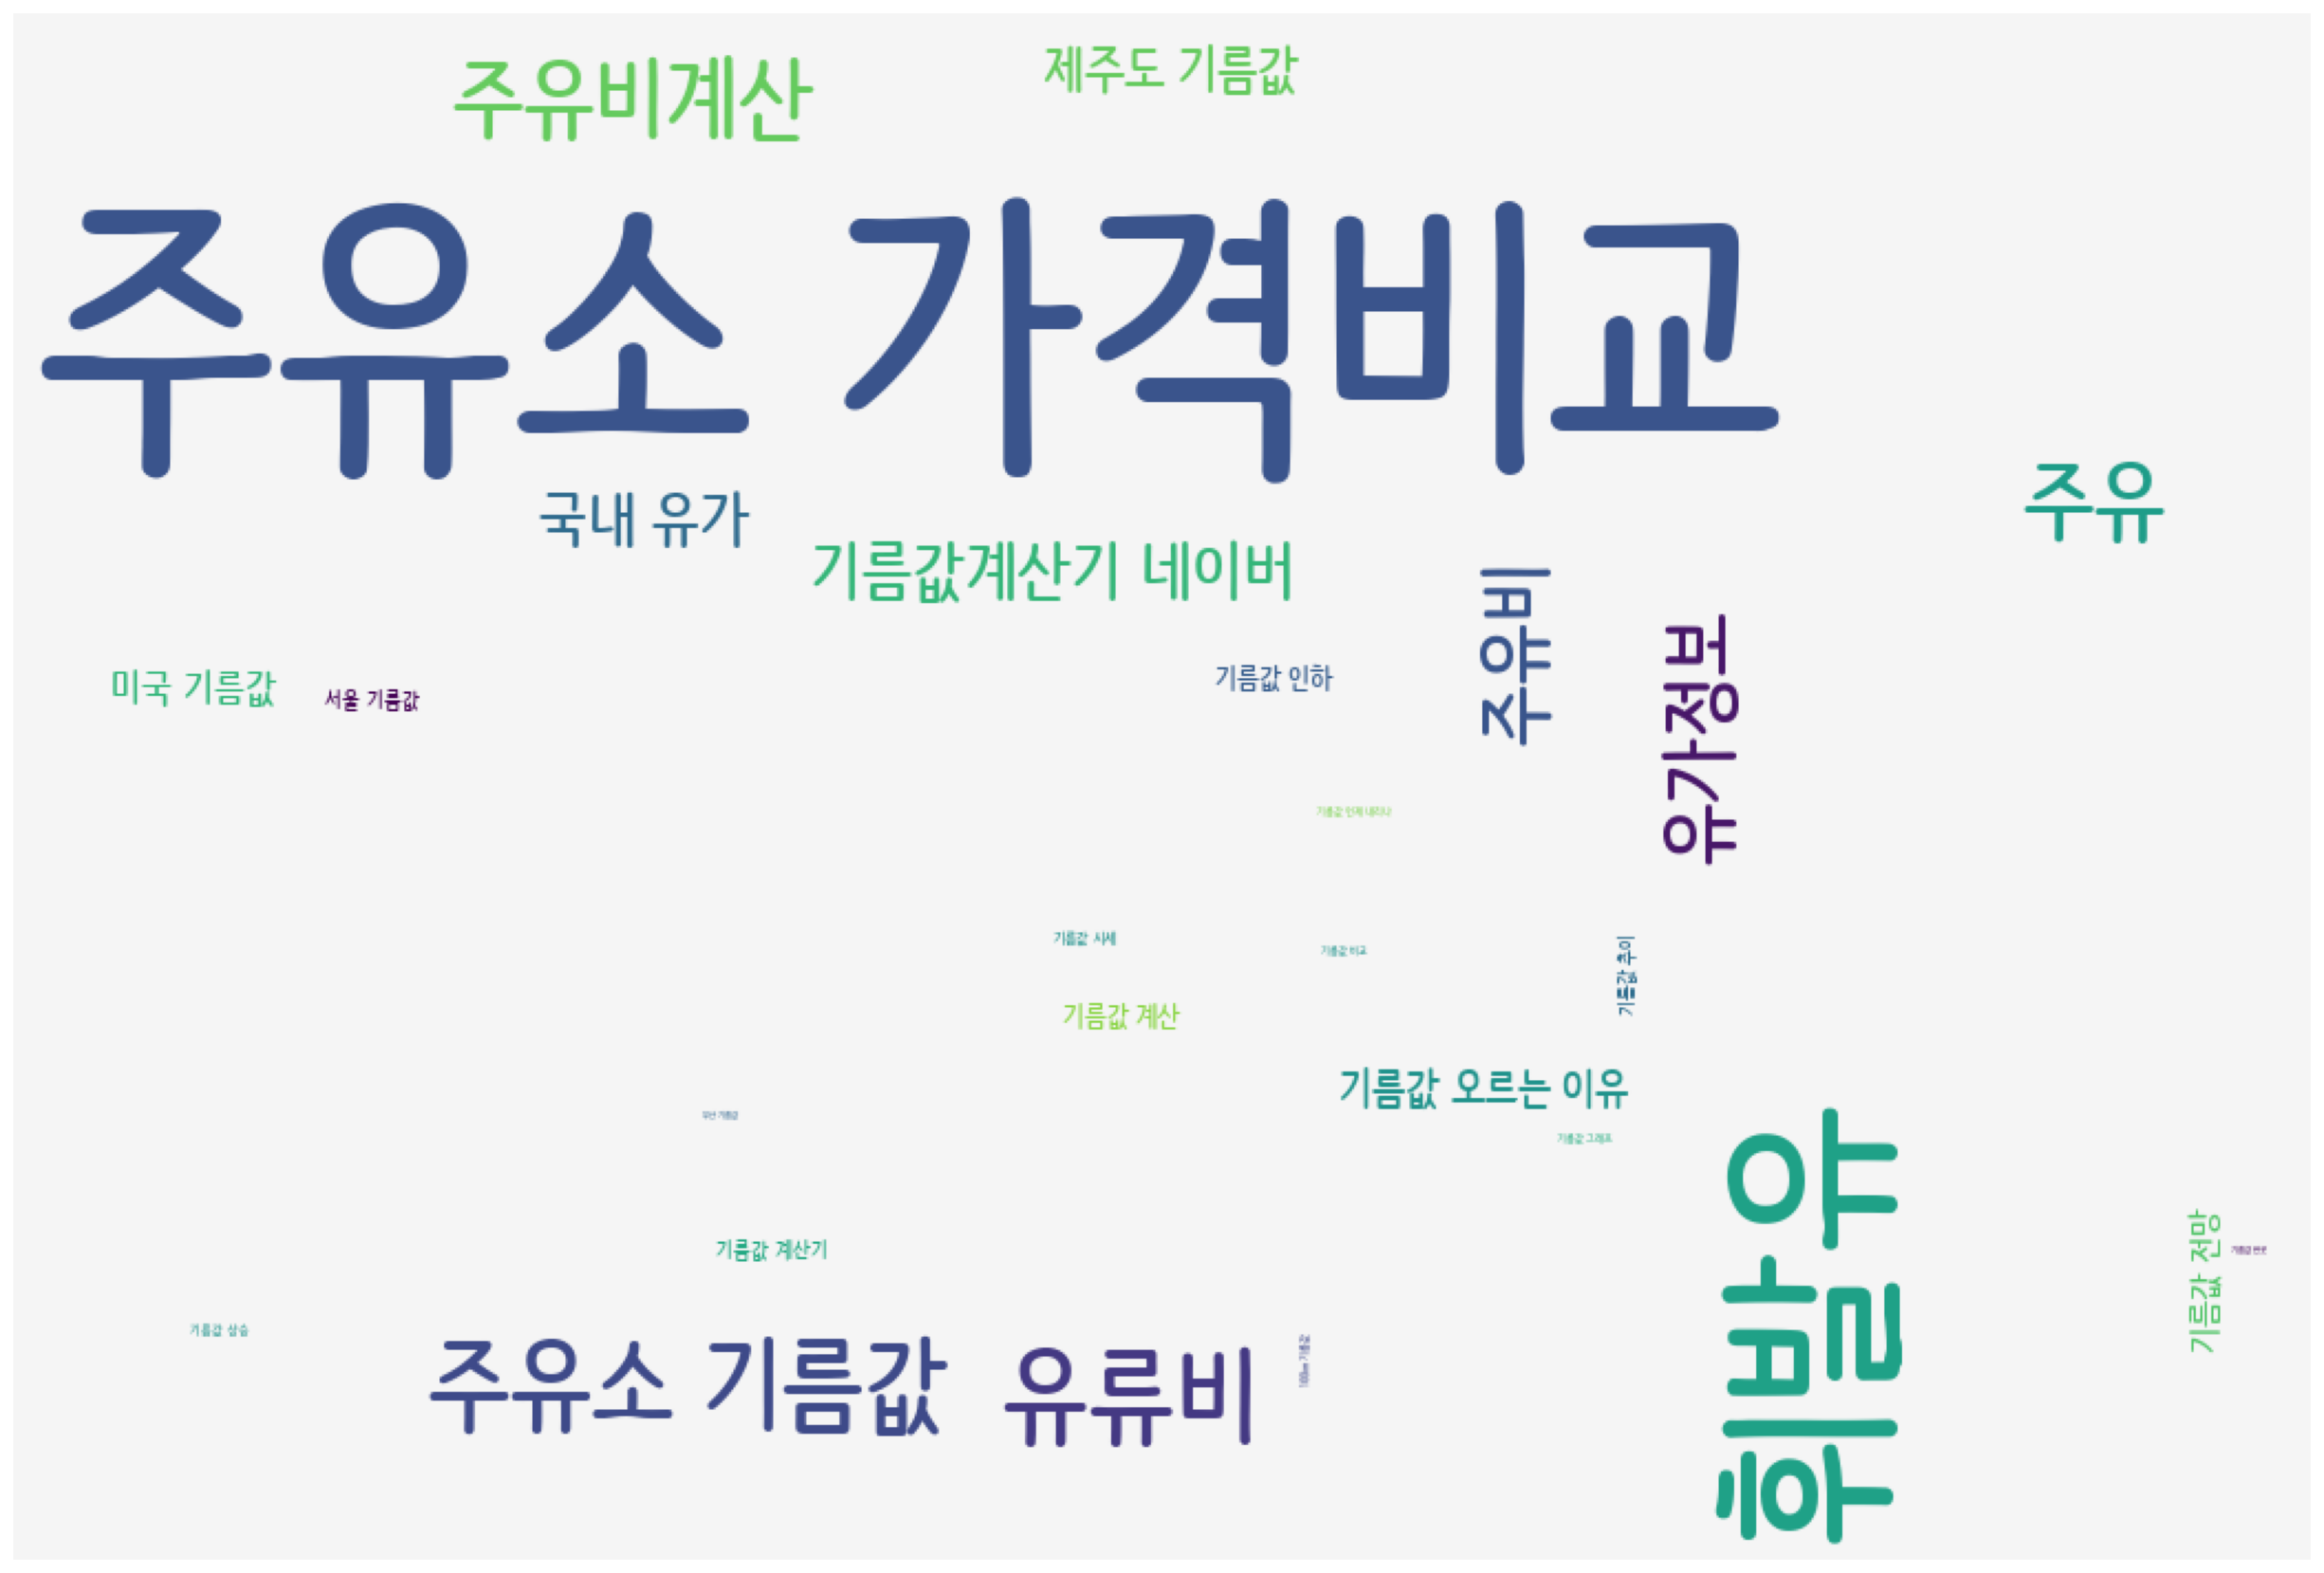

In [30]:
wc = WordCloud(font_path=font_path, background_color='#f5f5f5', width=1040, height=700)
cloud = wc.generate_from_frequencies(data)

plt.figure(figsize=(40,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

#### 월간검색량이 제일 많은 단어('주유소 가격비교')의 일간 검색 트렌드 확인하기

#### csv 파일 불러오기

In [31]:
trends = pd.read_csv('./data/주유소 가격비교_네이버_일간검색트렌드.csv', encoding='utf-8')
trends.head()

,period,searchVolume
0,2022-02-14,4140
1,2022-02-15,4550
2,2022-02-16,4250
3,2022-02-17,4540
4,2022-02-18,5320


#### 이 그래프를 통해 '주유소 가격비교'를 가장 많이 검색한 날짜와 가격변동이 많은 날짜와 연관성이 있는지에 대해 살펴보자!

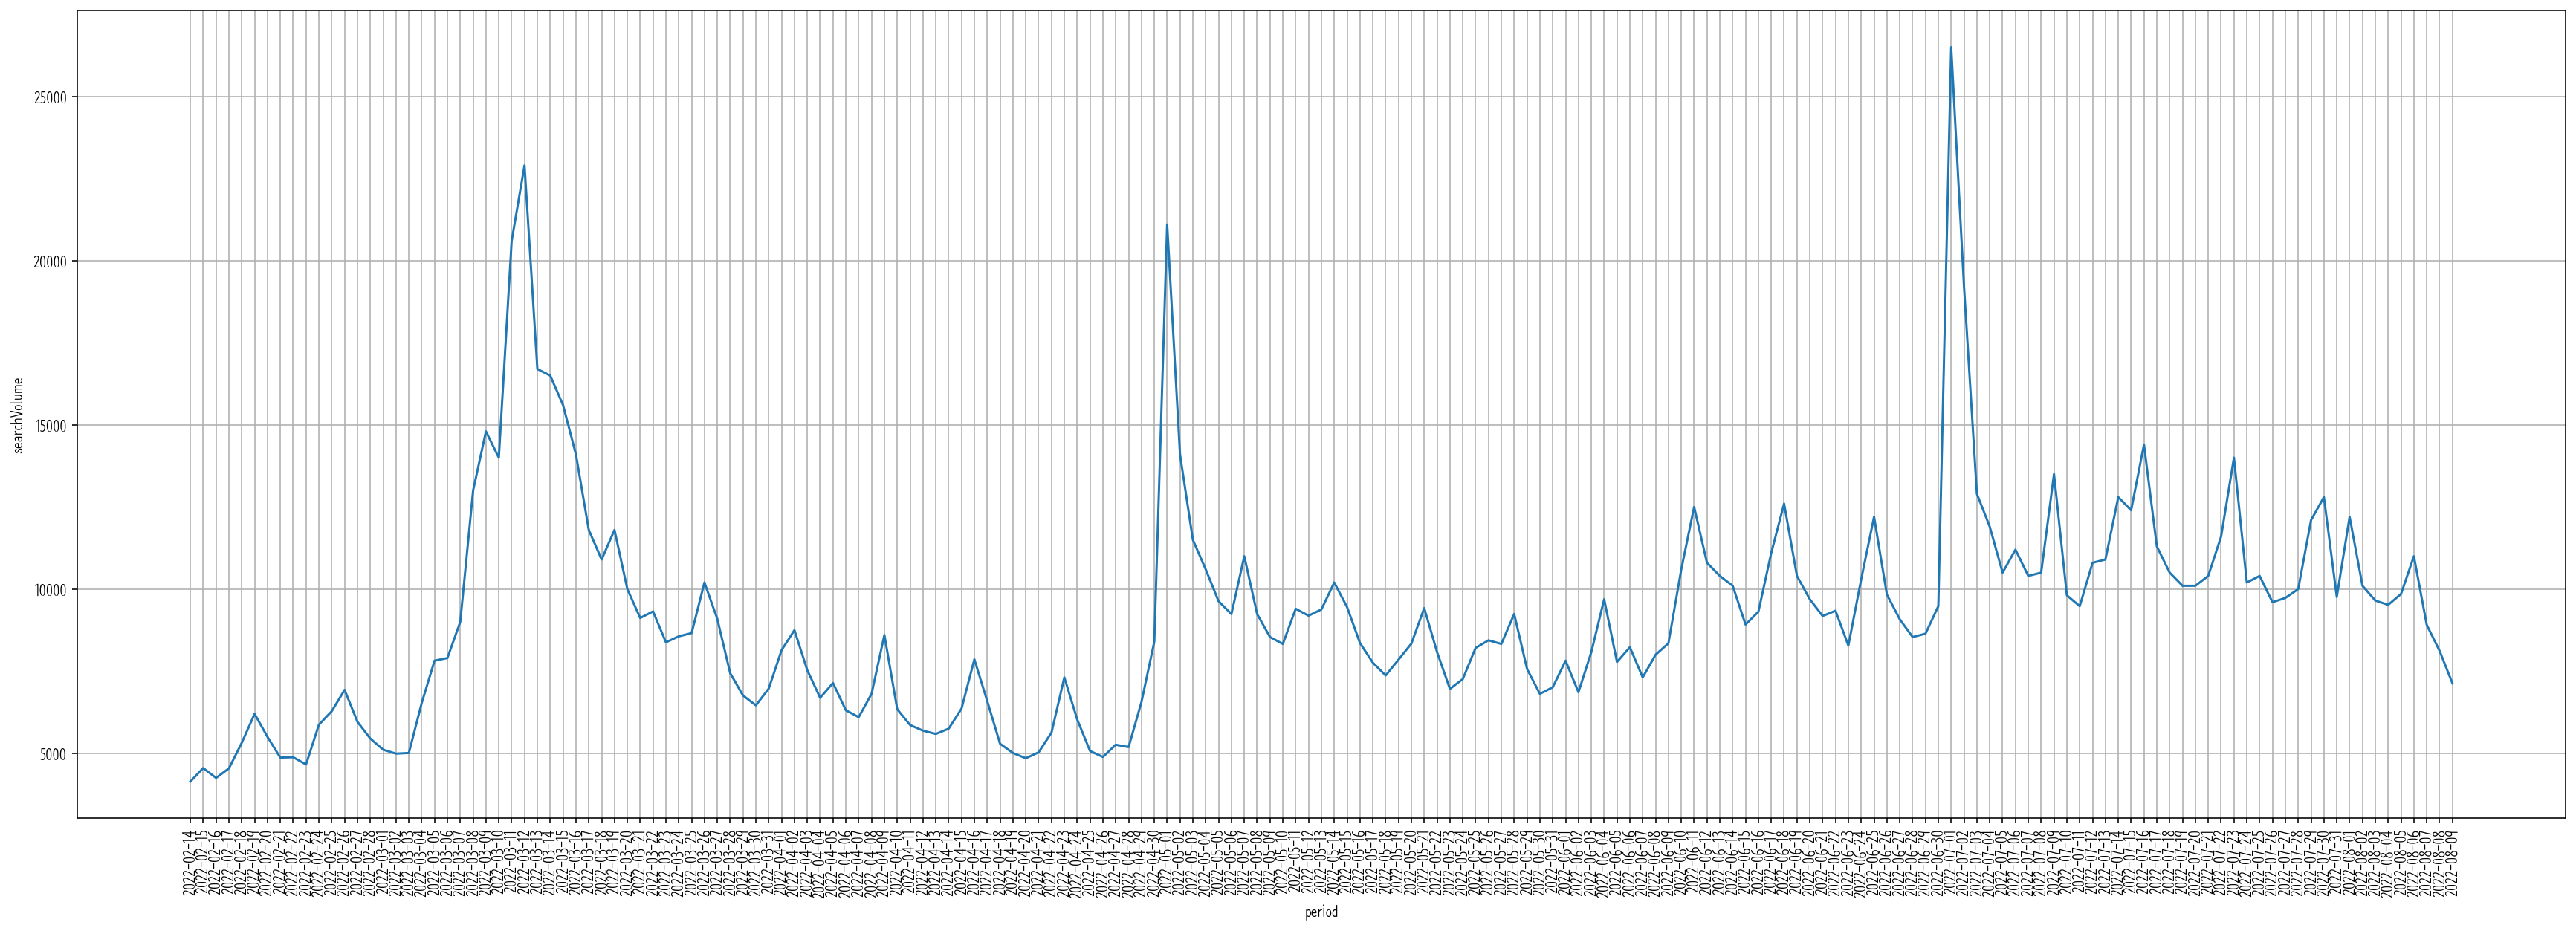

In [32]:
plt.figure(figsize=(30,10), facecolor='white')
plt.xlabel('period')
plt.ylabel('searchVolume')
plt.grid(True)
plt.plot(range(len(trends)), trends['searchVolume'])
plt.xticks(range(len(trends)), [text for text in trends['period']], rotation=90)
plt.show()

#### 저희 조의 주제인 기름값에 대해서 알아보기위해 기름값이라는 단어를 2022.2월 초부터 2022.8월초까지 검색량의 추이를 먼저 확인해봄

In [33]:
trends_oil = pd.read_csv('./data/기름값_네이버_일간검색트렌드.csv', encoding='utf-8')
trends_oil.head()

,period,searchVolume
0,2022-02-14,3700
1,2022-02-15,3830
2,2022-02-16,3600
3,2022-02-17,3860
4,2022-02-18,3830


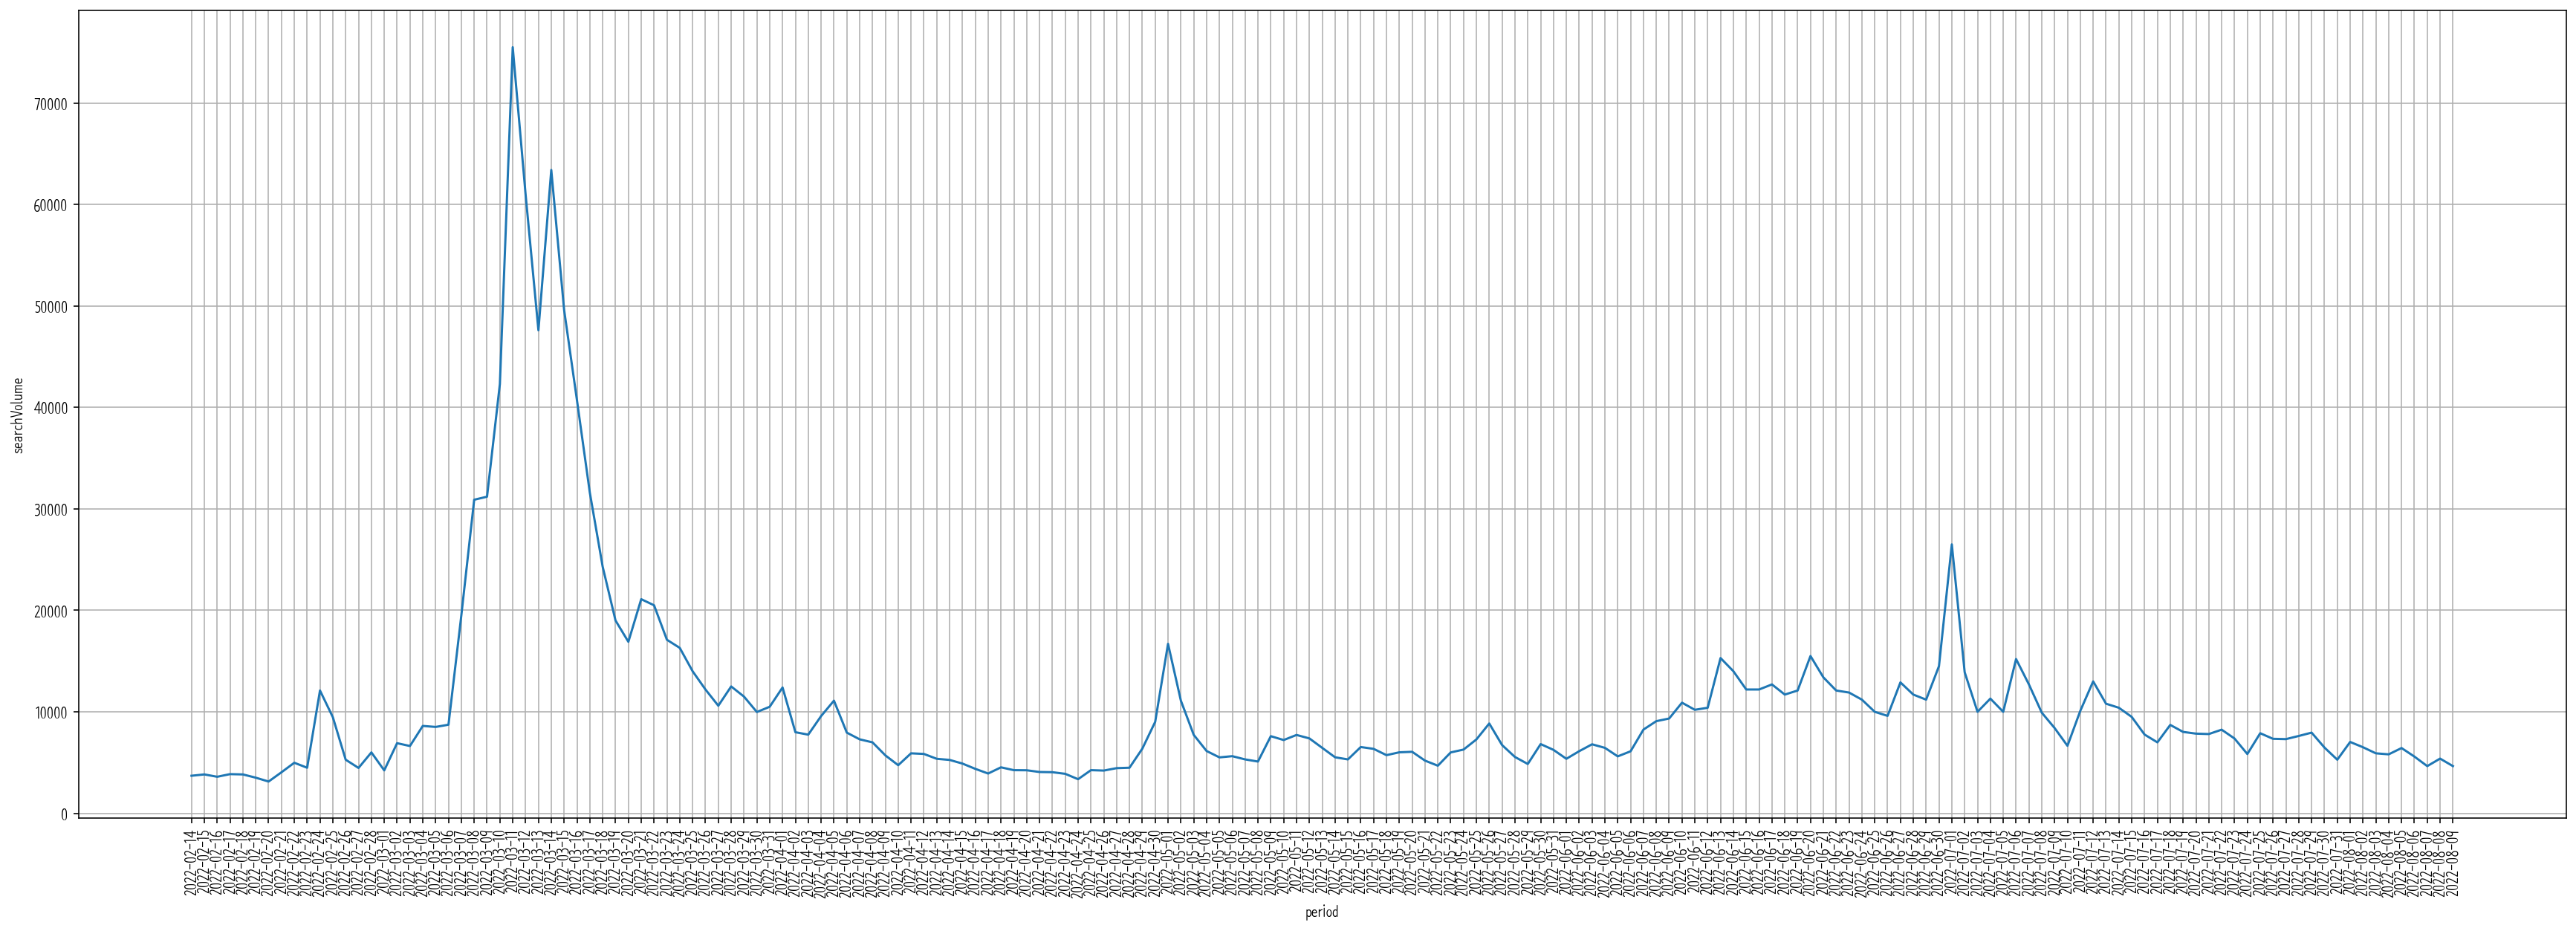

In [34]:
plt.figure(figsize=(30,10))
plt.xlabel('period')
plt.ylabel('searchVolume')
plt.grid(True)
plt.plot(range(len(trends_oil)), trends_oil['searchVolume'])
plt.xticks(range(len(trends_oil)), [text for text in trends_oil['period']], rotation=90)
plt.show()